In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU, PReLU , ELU

In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [9]:
x = pd.concat([x,geography,gender],axis=1)

In [10]:
x.drop(['Geography','Gender'],axis=1,inplace=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
classifier = Sequential()

In [15]:
classifier.add(Dense(units = 6 , kernel_initializer = 'uniform' , activation = 'relu' , input_dim =11))
classifier.add(Dense(units = 6 , kernel_initializer = 'uniform' , activation = 'relu'))
classifier.add(Dense(units = 1 , kernel_initializer = 'uniform' , activation = 'sigmoid'))

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
classifier.compile(loss = 'binary_crossentropy' , optimizer = 'adam' ,metrics = ['accuracy'])

In [18]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


536/536 [==============================] - 7s 7ms/step - loss: 0.5233 - accuracy: 0.7946 - val_loss: 0.4391 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4306 - accuracy: 0.7962 - val_loss: 0.4335 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4262 - accuracy: 0.7962 - val_loss: 0.4304 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4225 - accuracy: 0.7962 - val_loss: 0.4269 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4198 - accuracy: 0.8013 - val_loss: 0.4243 - val_accuracy: 0.8186
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4168 - accuracy: 0.8231 - val_loss: 0.4221 - val_accuracy: 0.8239
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4144 - accuracy: 0.8263 - val_loss: 0.4223 - val_accuracy: 0.82

In [19]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [20]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
cl = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
asc = accuracy_score(y_test , y_pred)

In [21]:
print(cm)
print(cl)
print(asc)

[[1528   67]
 [ 250  155]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.70      0.38      0.49       405

    accuracy                           0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000

0.8415


In [22]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

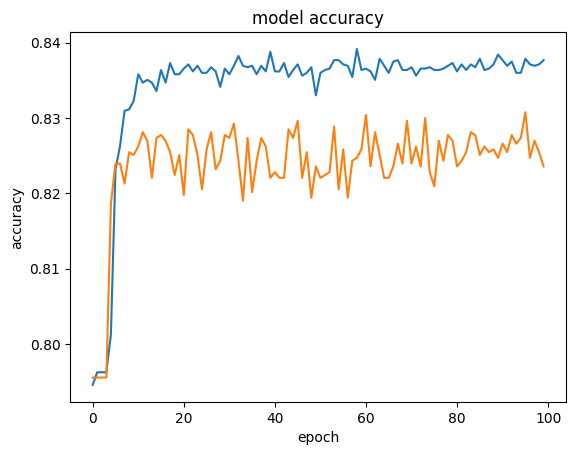

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')